<a href="https://colab.research.google.com/github/mheriyanto/Data-Science-and-Machine-Learning-References/blob/master/fwd_sp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

forward modeling function

In [0]:
# SP forward function
def SPfunc(x_inp, par):
    var_x0 = par[0]
    var_alpha = par[1]
    var_h = par[2]
    var_k = par[3]

    var_sp = []
    for i in x_inp:
        var_up = (i - var_x0) * np.cos(var_alpha) - var_h * np.sin(var_alpha)
        var_down = ((i - var_x0)*(i - var_x0) + var_h*var_h) ** (3/2)
        var = var_k * (var_up / var_down)
        var_sp.append(var)

    # === give noise for data (Gaussian Noise) 1
    std_noise = 10  # = %
    mean_noise = 0
    noise_data = np.random.normal(mean_noise, np.sqrt(std_noise), len(var_sp))
    var_sp_noise = var_sp + noise_data

    return var_sp, var_sp_noise, noise_data


Forward Modeling

In [0]:
# === TEST FORWARD MODELING
x0 = 77.07  # m
alpha = 309.37 * (np.pi/180)    # deg2rad
h = 41.81   # m
K = 94686

Calculating data

In [18]:
measure_loc = np.linspace(0, 150, 101)  # Location of measurement
print('number of data: ', len(measure_loc))
par_mod = [x0, alpha, h, K]      # model parameter of subsurface

get_SPData, get_SPData_noise, noise_from_maxData = SPfunc(measure_loc, par_mod)

number of data:  101


Plotting

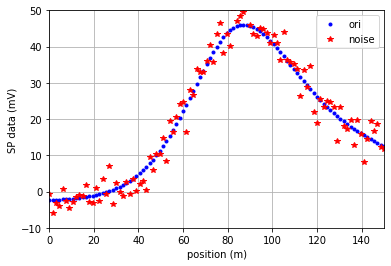

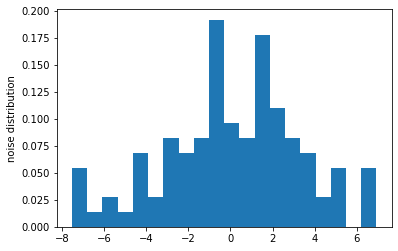

In [21]:
plt.figure()
plt.plot(measure_loc, get_SPData, 'b.')
plt.plot(measure_loc, get_SPData_noise, 'r*')
plt.xlim([0, 150])
plt.ylim([-10, 50])
plt.xlabel('position (m)')
plt.ylabel('SP data (mV)')
plt.legend(['ori', 'noise'])
plt.grid()

plt.figure()
plt.hist(noise_from_maxData, density=True, bins=20)
plt.ylabel('noise distribution')
plt.show()

Save output

In [0]:
with open('SP_syn_data.pickle', 'wb') as f:
    pickle.dump([measure_loc, get_SPData_noise], f)